### Libraries needed

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform, norm
import seaborn as sns

Change the parameters and the expression according to your needs

In [11]:
np.random.seed(42)

In [9]:
def data_gen_process(seed, beta1, beta2, n, lower_bound_x, upper_bound_x, var_epsilon):

   np.random.seed(seed)
   epsilon = np.random.normal(0, var_epsilon, n)
   x = np.random.uniform(lower_bound_x, upper_bound_x, n)
   x_law = "uniform"
   y = beta1*x + beta2*x**2 + epsilon
   expression = "quadratic"
   
   df_x = pd.DataFrame(x, columns=['x_values'])
   df_y = pd.DataFrame(y, columns=['y_values'])

   df_x.to_csv(f"Data/x_{x_law}_values_{lower_bound_x}_{upper_bound_x}_n{n}.csv")
   df_y.to_csv(f"Data/y_{expression}_values_beta1_{beta1}_beta2_{beta2}_n{n}_x_{lower_bound_x}_{upper_bound_x}_vareps_{var_epsilon}.csv")

   print(f"X values have been saved in the file : x_{x_law}_values_{lower_bound_x}_{upper_bound_x}_n{n}.csv")
   print(f"Y values have been saved in the file : y_{expression}_values_beta1_{beta1}_beta2_{beta2}_n{n}_x_{lower_bound_x}_{upper_bound_x}_vareps_{var_epsilon}.csv")

In [10]:
data_gen_process(42,1,0.16,1000,0,5,1)

X values have been saved in the file : x_uniform_values_0_5_n1000.csv
Y values have been saved in the file : y_quadratic_values_beta1_1_beta2_0.16_n1000_x_0_5_vareps_1.csv


Other example of generating data process

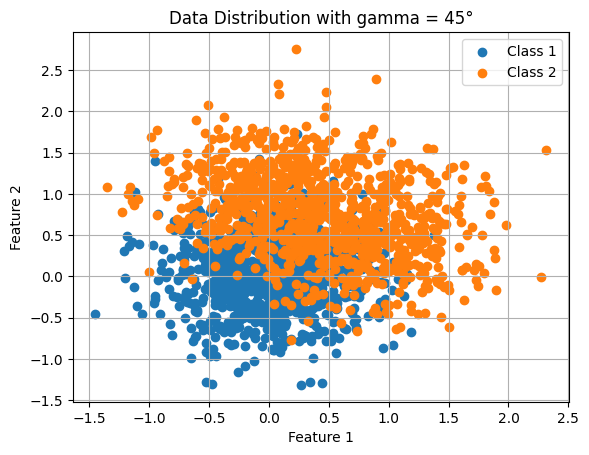

In [12]:
def generate_data(n, gamma):  

    mean1 = [0, 0]
    mean2a = [0, 1]
    gamma_rad = np.deg2rad(gamma)
    mean2b = [np.cos(gamma_rad), np.sin(gamma_rad)]
    cov = np.diag([0.2, 0.2])  # Covariance matrix
    
    n_class = n // 2

    class1 = np.random.multivariate_normal(mean1, cov, n_class)
    
    class2a = np.random.multivariate_normal(mean2a, cov, n_class // 2)
    class2b = np.random.multivariate_normal(mean2b, cov, n_class // 2)
    class2 = np.vstack((class2a, class2b))
    
    labels_class1 = np.zeros(n_class)
    labels_class2 = np.ones(n_class)
    
    X = np.vstack((class1, class2))
    y = np.hstack((labels_class1, labels_class2))

    df_x = pd.DataFrame(X, columns=[['x_values_abscisses', 'x_values_ordonnees']])
    df_y = pd.DataFrame(y, columns=['y_class'])

    df_x.to_csv(f"Data/x_values_gamma{gamma}_n{n}.csv")
    df_y.to_csv(f"Data/y_values_gamma{gamma}_n{n}.csv")

    plt.figure()
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label='Class 1')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Class 2')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.title(f'Data Distribution with gamma = {45}°')
    plt.grid(True)
    plt.show()

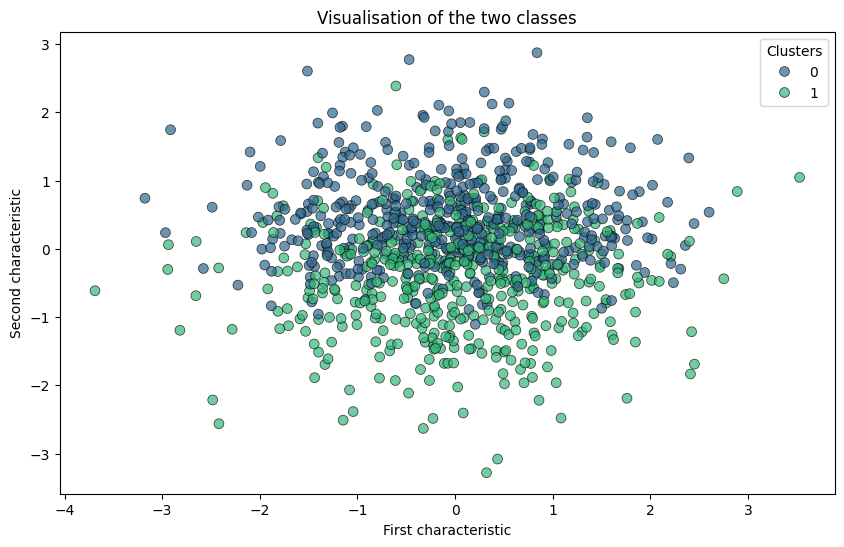

In [15]:
from sklearn.datasets import make_classification
def simulate_classification():

   X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

   df_x = pd.DataFrame(X)
   df_y = pd.DataFrame(y, columns=['y_values'])

   df_x.to_csv(f"Data/x_make_classification_1000_20.csv")
   df_y.to_csv(f"Data/y_make_classification_1000_20.csv")

   plt.figure(figsize=(10, 6))
   sns.scatterplot(x=df_x.iloc[:, 0], y=df_x.iloc[:, 1], hue=df_y['y_values'], palette="viridis", s=50, alpha=0.7, edgecolor='k')
   plt.title("Visualisation of the two classes")
   plt.xlabel("First characteristic")
   plt.ylabel("Second characteristic")
   plt.legend(title="Clusters")
   plt.show()

simulate_classification()

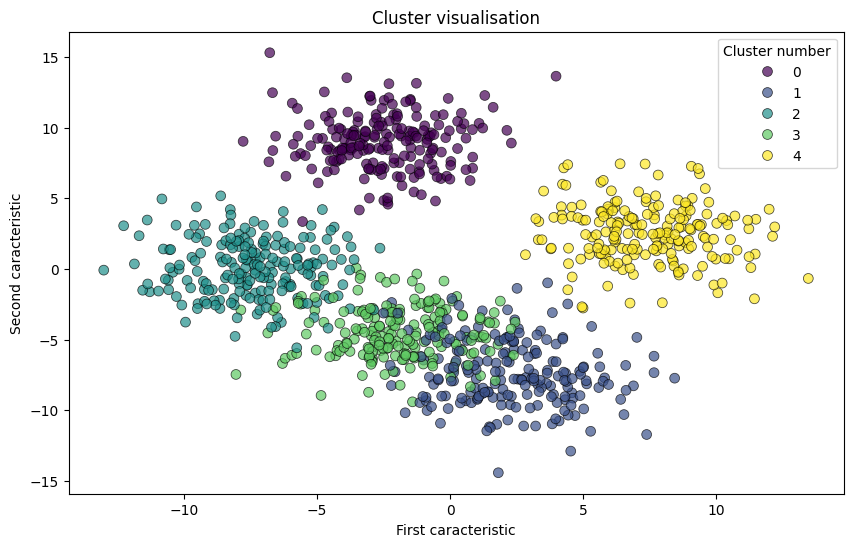

In [17]:
from sklearn.datasets import make_blobs

def simulate_segmentation():

   X, y = make_blobs(n_samples=1000, n_features=20, centers=5, cluster_std=2.0, random_state=42)

   df_x = pd.DataFrame(X)
   df_y = pd.DataFrame(y, columns=['cluster'])

   df_x.to_csv("Data/x_make_blobs_1000_20.csv", index=False)
   df_y.to_csv("Data/y_make_blobs_1000_20.csv", index=False)

   plt.figure(figsize=(10, 6))
   sns.scatterplot(x=df_x.iloc[:, 0], y=df_x.iloc[:, 1], hue=df_y['cluster'], palette="viridis", s=50, alpha=0.7, edgecolor='k')
   plt.title("Cluster visualisation")
   plt.xlabel("First caracteristic")
   plt.ylabel("Second caracteristic")
   plt.legend(title="Cluster number")
   plt.show()

simulate_segmentation()